<a href="https://colab.research.google.com/github/yamasaki-yu/learning/blob/master/Experiment_iroiroBinning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### いろんなビニングの実装
* バケット
* 分位
* Winsorized
* カットポイント


In [8]:
#!pip install mglearn

In [3]:
# ライブラリのインポート
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import  OneHotEncoder

## 認証を行ってgoogle driveをマウントする
#from google.colab import drive
#drive.mount('/content/drive')


[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]
 [-2.87649303]
 [ 2.81945911]
 [ 1.99465584]
 [-1.72596534]
 [-1.9090502 ]
 [-1.89957294]
 [-1.17454654]
 [ 0.14853859]
 [-0.40832989]
 [-1.25262516]]
[-0.78148447  0.97620807  0.51458452  0.28822495 -0.55928086 -1.25521081
 -1.45886677  1.72401776  0.14374962  0.53741969 -0.42267362  0.51917449
  1.97513712 -0.94738482 -1.03168468 -0.4851345  -0.21001776 -0.02269467
 -1.14794519 -0.55627131]


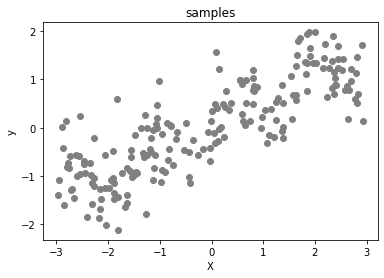

In [4]:
# データセットの読み込み
X,y = mglearn.datasets.make_wave(n_samples=200)

print(X[:20])
print(y[:20])

# 描画
plt.plot(X[:,0], y, "o", c="gray")  
plt.title("samples")
plt.ylabel("y")
plt.xlabel("X")
plt.show()


In [5]:
# ビニングしたモデルの学習と描画
def fitting_with_binning(X, y, bins, model_title):

  print(np.min(X))
  print(np.max(X))

  # カテゴリ特徴量への置き換え
  witch_bin = np.digitize(X, bins = bins)
  print( "\nData points : \n", X[:5])
  print( "\nBin membership for Data points : \n", witch_bin[:5])

  # one hot encording
  encoder = OneHotEncoder(sparse=False)
  encoder.fit(witch_bin)
  X_binned = encoder.transform(witch_bin)
  print("shape : {}" .format(X_binned.shape))
  print(X_binned[:5])

  #画像の保存の準備
  fig = plt.figure()

  # 描画
  plt.plot(X[:,0], y, "o", c="gray")
  plt.vlines(bins, np.min(X), np.max(X), linewidth=1, alpha=.2)

  # 線形回帰

  # ビニングなし
  lr_nobinning = LinearRegression()
  lr_nobinning.fit(X,y)
  line = np.linspace(np.min(X), np.max(X), 1000, endpoint=False).reshape(-1,1)
  plt.plot(line, lr_nobinning.predict(line), label = "no_binning")

  # ビニングあり
  lr_binning = LinearRegression()
  lr_binning.fit(X_binned,y)
  line_binned =  encoder.transform( np.digitize(line, bins = bins) )
  plt.plot(line, lr_binning.predict(line_binned), label = model_title)

  plt.title(model_title)
  plt.ylabel("output")
  plt.xlabel("input")
  plt.legend()
  plt.show()

  # グラフをファイルに保存する
  #fig.savefig('/content/drive/My Drive/' + model_title + ".jpg")

In [6]:

# ビニング
max_val = 3
min_val = -3

#### バケットビニング ####
n_split_bucket = 10
bins_Bucket = np.linspace(np.max(X), np.min(X), n_split_bucket+1)
print("bins_Bucket : {}" .format(bins_Bucket))

#### 分位ビニング ####
n_split_Quantile = 10
# 逆順にソート
X_sort = X[ np.argsort( X[:,0] )[::-1] ]
y_sort = y[ np.argsort( X[:,0] )[::-1] ]
# binの境界の値を取得
index = np.linspace(len(X), 0, n_split_Quantile+1)
mask = np.isin(np.arange(len(X)) ,index)
bins_Quantile = X_sort[mask].reshape(-1)
print("bins_Quantile : {}" .format(bins_Quantile))

#### Winsorizedビニング ####
n_split_Winsorized = 10
trim_rate = 0.1
# 逆順にソート
X_sort = X[ np.argsort( X[:,0] )[::-1] ]
# トリミングするデータ数(片側)
n_trim = int(len(X) * trim_rate/2)
# トリミング
X_Winsorized = X_sort
X_Winsorized[:n_trim] = X_sort[n_trim]
X_Winsorized[(len(X)-n_trim):] = X_sort[(len(X)-n_trim)]
# binの境界の値を取得
bins_Winsorized = np.linspace(np.max(X_Winsorized), np.min(X_Winsorized), n_split_Winsorized+1)
print("bins_Winsorized : {}" .format(bins_Winsorized))


#### カットポイントビニング ####
bins_Cutpoint = np.array([-3, -1.1, -0.5, 0.5, 1.8, 3])
print("bins_Cutpoint : {}" .format(bins_Cutpoint))
bins_Cutpoint.shape



bins_Bucket : [ 2.92132162  2.33250273  1.74368384  1.15486494  0.56604605 -0.02277284
 -0.61159173 -1.20041062 -1.78922951 -2.37804841 -2.9668673 ]
bins_Quantile : [ 2.92132162  2.38266156  1.82203246  1.14562643  0.55448741 -0.03722642
 -0.96582125 -1.37190581 -1.89957294 -2.45826138]
bins_Winsorized : [ 2.63699365  2.10043066  1.56386767  1.02730467  0.49074168 -0.04582131
 -0.5823843  -1.11894729 -1.65551028 -2.19207327 -2.72863627]
bins_Cutpoint : [-3.  -1.1 -0.5  0.5  1.8  3. ]


(6,)

-2.9668672972583856
2.9213216196031038

Data points : 
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Bin membership for Data points : 
 [[7]
 [1]
 [3]
 [4]
 [9]]
shape : (200, 11)
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


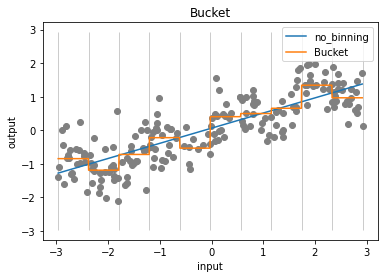

-2.9668672972583856
2.9213216196031038

Data points : 
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Bin membership for Data points : 
 [[6]
 [1]
 [3]
 [4]
 [9]]
shape : (200, 11)
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


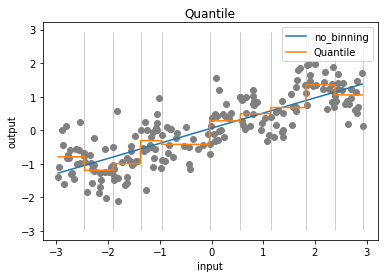

-2.7286362665367716
2.6369936493851345

Data points : 
 [[2.63699365]
 [2.63699365]
 [2.63699365]
 [2.63699365]
 [2.63699365]]

Bin membership for Data points : 
 [[0]
 [0]
 [0]
 [0]
 [0]]
shape : (200, 11)
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


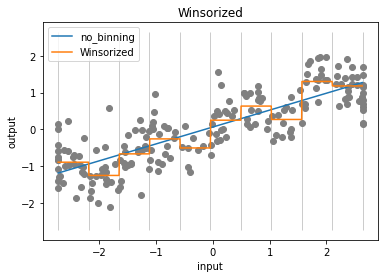

-2.9668672972583856
2.9213216196031038

Data points : 
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Bin membership for Data points : 
 [[2]
 [5]
 [4]
 [4]
 [1]]
shape : (200, 5)
[[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]]


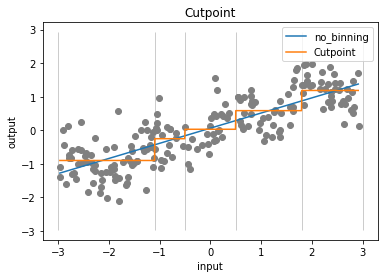

In [7]:
fitting_with_binning(X, y, bins_Bucket, "Bucket")
fitting_with_binning(X, y, bins_Quantile, "Quantile")
fitting_with_binning(X_Winsorized, y_sort, bins_Winsorized, "Winsorized")
fitting_with_binning(X, y, bins_Cutpoint, "Cutpoint")